In [1]:
!date

Sat Jan 21 02:08:38 PST 2023


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn.objects as so

In [7]:
input_dir='/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/coverage_plots/'

In [8]:
df_5prime = pd.read_csv(input_dir+'5prime_all.geneBodyCoverage.txt',sep='\t')

In [9]:
#normalize coverage
df = df_5prime.drop('percentile', axis=1)
cov_5prime = (df-df.min())/(df.max()-df.min())

cov_5prime['percentile'] = df_5prime['percentile']

cov_5prime = cov_5prime.rename(columns={'count':'5prime'})

In [10]:
cov_5prime.head()

,5prime,percentile
0,0.695095,0
1,0.881824,1
2,0.969940,2
3,1.000000,3
4,0.999306,4


In [11]:
df_internal = pd.read_csv(input_dir+'internal_all.geneBodyCoverage.txt',sep='\t')

In [12]:
#normalize coverage
df = df_internal.drop('percentile', axis=1)
cov_internal = (df-df.min())/(df.max()-df.min())

cov_internal['percentile'] = df_internal['percentile']

cov_internal = cov_internal.rename(columns={'count':'internal'})

In [13]:
cov_internal.head()

,internal,percentile
0,0.000000,0
1,0.078681,1
2,0.157926,2
3,0.234417,3
4,0.302653,4


In [15]:
df_3prime = pd.read_csv(input_dir+'3prime_all.geneBodyCoverage.txt',sep='\t')

In [16]:
#normalize coverage
df = df_3prime.drop('percentile', axis=1)
cov_3prime = (df-df.min())/(df.max()-df.min())

cov_3prime['percentile'] = df_3prime['percentile']

cov_3prime = cov_3prime.rename(columns={'count':'3prime'})

In [18]:
cov = pd.merge(cov_5prime, cov_internal, on='percentile')

cov = pd.merge(cov, cov_3prime, on='percentile')



In [19]:
cov = cov.melt(id_vars=['percentile'],
        var_name='Library', value_name='Coverage')

In [20]:
#cov['color'] = cov['Library'].map(color_mode)

In [30]:
p = so.Plot(cov, "percentile", "Coverage", color="Library",
           )

/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


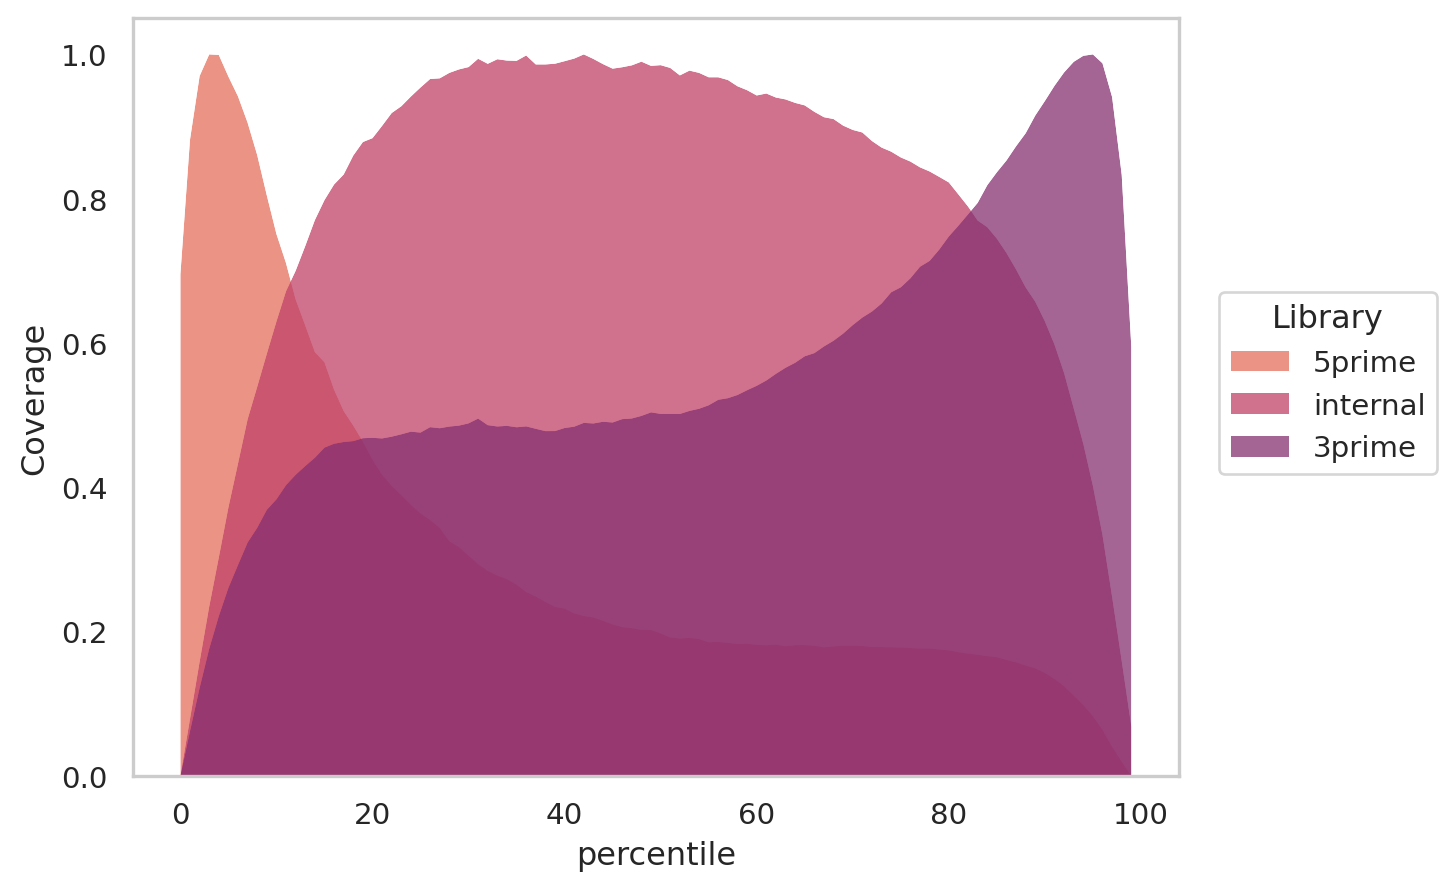

In [31]:
from seaborn import axes_style

p.add(so.Line(linewidth=0,
             )).add(
    so.Area(alpha=.75,edgewidth=0
           )).theme(
    axes_style({**axes_style("whitegrid"), 'axes.grid': False,})).scale(color="flare")

#.save('./plots/Coverage.pdf')



In [33]:
p = so.Plot(cov, "percentile", "Coverage", color="Library",
           ).facet(row="Library")

/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/c4/home/derek/miniconda3/envs/pygenometracks/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] =

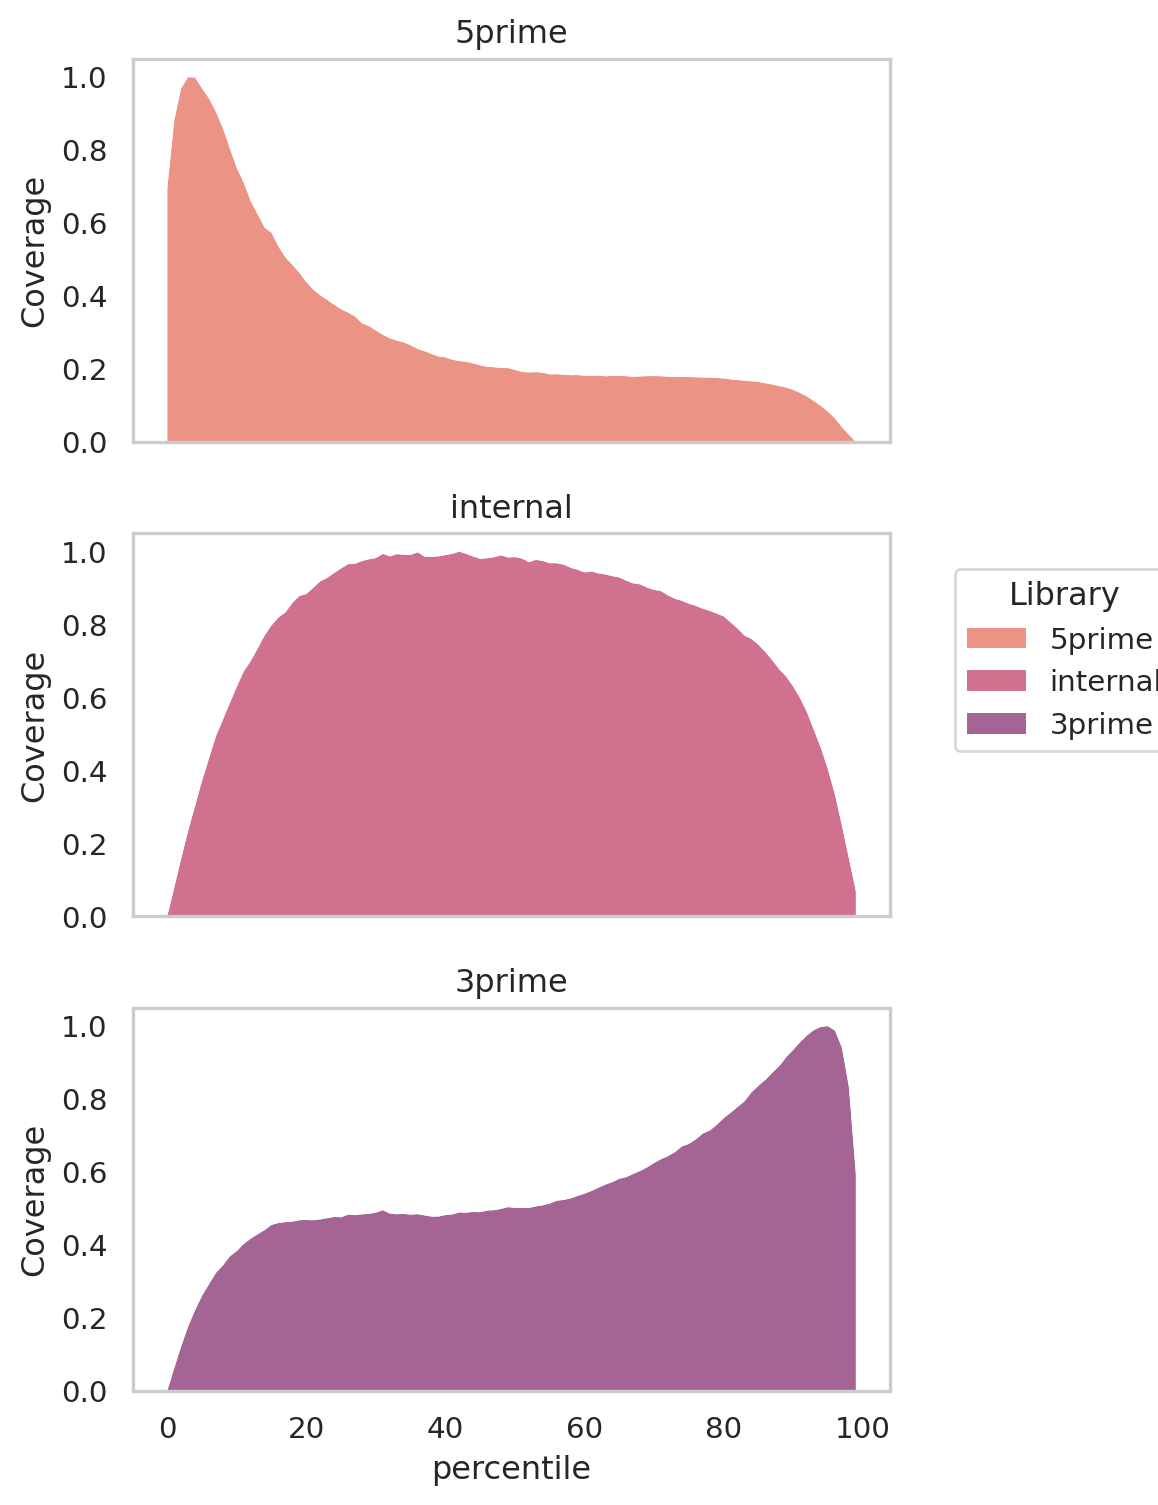

In [41]:
from seaborn import axes_style

p.add(so.Line(linewidth=0,
             )).add(
    so.Area(alpha=.75,edgewidth=0
           )).theme(
    axes_style({**axes_style("whitegrid"),'axes.grid': False,})).scale(color="flare").layout(size=(5,8)).save('./plots/Coverage.pdf')

